**Linn Cao Nguyen Phuong**

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## Task 1: Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [2]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1b) Projection
1. Read the toy dataset in 'data/gauss_3d.csv' using genfromtxt into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a figure with 3 subplots, one for every possible combination of the dataset's dimensions (X vs Y, Y vs Z, and Z vs X). Each of these plots shows a different 2D __projection__ of the 3D dataset (each column is a different dimension). 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 
  
3. Make sure each subplot has a title

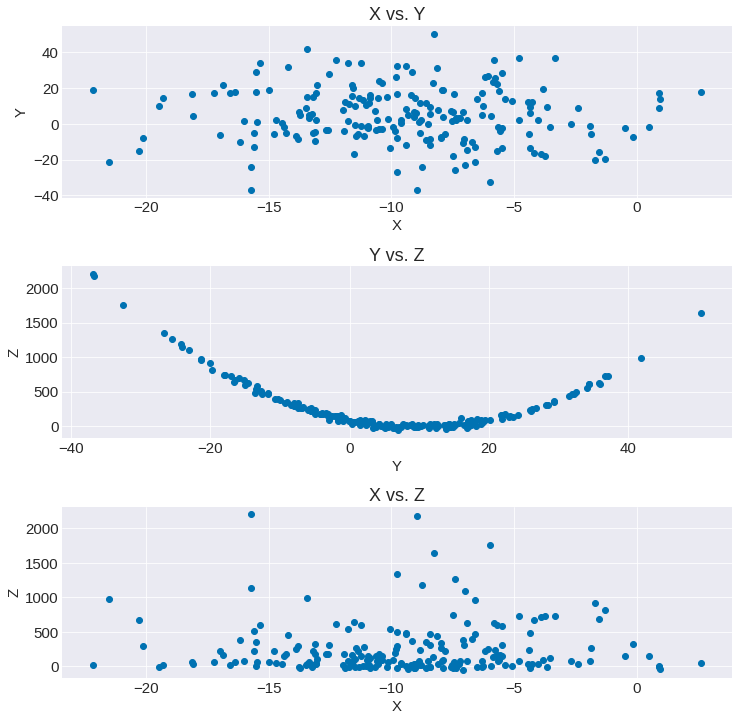

In [13]:
array = np.genfromtxt("data/gauss_3d.csv", delimiter = ",")
plt.figure(figsize=(12,12))

fig1 = plt.subplot(311)
plt.scatter(array[:,0], array[:,1])
plt.xlabel('X')
plt.ylabel('Y')
fig1.set_title('X vs. Y')

fig2 = plt.subplot(312)
plt.scatter(array[:,1], array[:,2])
plt.xlabel('Y')
plt.ylabel('Z')
fig2.set_title('Y vs. Z')

fig3 = plt.subplot(313)
plt.scatter(array[:,0], array[:,2])
plt.xlabel('X')
plt.ylabel('Z')
fig3.set_title('X vs. Z')

plt.subplots_adjust(hspace=.4)

plt.show()

### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [19]:
onearr = np.ones((200, 1))
stackedarr = np.hstack([array, onearr])
print(stackedarr)

[[  -1.878   -1.013   73.627    1.   ]
 [ -13.059   17.36    41.08     1.   ]
 [ -12.641   -3.435  174.669    1.   ]
 [ -15.365   34.323  607.439    1.   ]
 [  -5.673  -14.979  598.393    1.   ]
 [ -21.508  -21.41   973.77     1.   ]
 [  -1.276  -19.761  817.145    1.   ]
 [ -13.806   -8.358  301.274    1.   ]
 [  -8.405  -11.787  470.952    1.   ]
 [ -11.247   34.341  605.098    1.   ]
 [  -2.689    0.103   75.917    1.   ]
 [ -20.301  -15.14   668.435    1.   ]
 [ -11.612   21.716  166.265    1.   ]
 [ -11.92    -3.798  173.865    1.   ]
 [  -4.331  -13.553  479.397    1.   ]
 [ -15.499   18.138    6.781    1.   ]
 [ -10.862   14.35   -15.52     1.   ]
 [ -14.389   -1.524  145.707    1.   ]
 [  -9.789   26.113  252.389    1.   ]
 [  -7.086    6.937  -57.971    1.   ]
 [ -15.503   29.254  350.007    1.   ]
 [  -4.276   12.541   31.791    1.   ]
 [  -5.492   28.382  313.531    1.   ]
 [  -7.488    6.641  -22.467    1.   ]
 [  -5.496  -13.296  579.077    1.   ]
 [ -13.419   41.741  993.

## Task 2: Translation

### 2a) Create the Translation Matrix

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print your matrix


In [17]:
idmtrx = np.eye(4)
idmtrx[1,3] = 25
idmtrx[2,3] = -1000
print(idmtrx)

[[    1.     0.     0.     0.]
 [    0.     1.     0.    25.]
 [    0.     0.     1. -1000.]
 [    0.     0.     0.     1.]]


### 2b) Translate Data and Visualize Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and translated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the translated data in different colors.
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

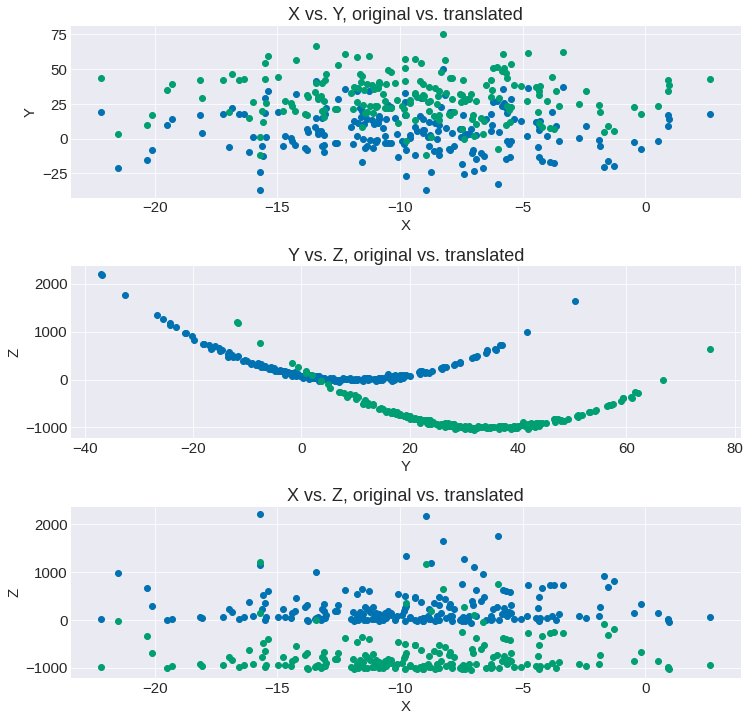

In [40]:
mult = np.matmul(idmtrx, stackedarr.T).T
# print(mult)
plt.figure(figsize=(12,12))

fig1 = plt.subplot(311)
plt.scatter(array[:,0], array[:,1])
plt.scatter(mult[:,0], mult[:,1])
plt.xlabel('X')
plt.ylabel('Y')
fig1.set_title('X vs. Y, original vs. translated')

# fig2 = plt.subplot(622)
# plt.scatter(mult[:,0], mult[:,1])
# plt.xlabel('X')
# plt.ylabel('Y')
# fig2.set_title('X vs. Y translated')

fig2 = plt.subplot(312)
plt.scatter(array[:,1], array[:,2])
plt.scatter(mult[:,1], mult[:,2])
plt.xlabel('Y')
plt.ylabel('Z')
fig2.set_title('Y vs. Z, original vs. translated')

# fig4 = plt.subplot(624)
# plt.scatter(mult[:,1], mult[:,2])
# plt.xlabel('Y')
# plt.ylabel('Z')
# fig4.set_title('Y vs. Z translated')

fig3 = plt.subplot(313)
plt.scatter(array[:,0], array[:,2])
plt.scatter(mult[:,0], mult[:,2])
plt.xlabel('X')
plt.ylabel('Z')
fig3.set_title('X vs. Z, original vs. translated')

# fig6 = plt.subplot(626)
# plt.scatter(mult[:,0], mult[:,2])
# plt.xlabel('X')
# plt.ylabel('Z')
# fig6.set_title('X vs. Z translated')

plt.subplots_adjust(hspace=.4)

plt.show()

## Task 3: Scale

### 3a) Create a Scaling Matrix

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print the matrix

In [34]:
idmtrx2 = np.eye(4)
idmtrx2[0,0] = 3
idmtrx2[2,2] = .1
print(idmtrx2)

[[3.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  1. ]]


### 3b) Scale Data and Visualize the Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and scaled results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the scaled data in different colors.
  - <i>If you implemented a function in the previous step, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

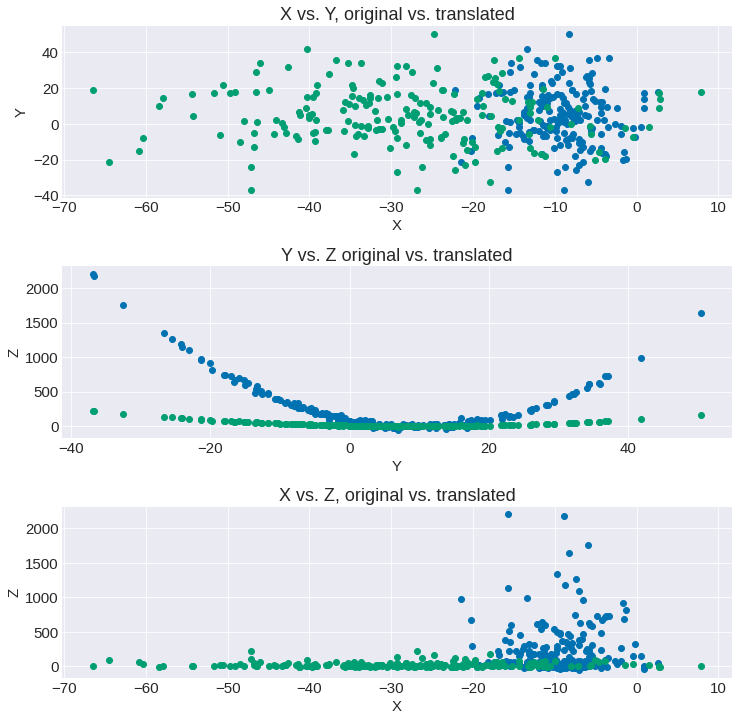

In [45]:
mult2 = np.matmul(idmtrx2, stackedarr.T).T
# print(mult2)
plt.figure(figsize=(12,12))

fig1 = plt.subplot(311)
plt.scatter(array[:,0], array[:,1])
plt.scatter(mult2[:,0], mult2[:,1])
plt.xlabel('X')
plt.ylabel('Y')
fig1.set_title('X vs. Y, original vs. translated')

fig2 = plt.subplot(312)
plt.scatter(array[:,1], array[:,2])
plt.scatter(mult2[:,1], mult2[:,2])
plt.xlabel('Y')
plt.ylabel('Z')
fig2.set_title('Y vs. Z original vs. translated')

fig5 = plt.subplot(313)
plt.scatter(array[:,0], array[:,2])
plt.scatter(mult2[:,0], mult2[:,2])
plt.xlabel('X')
plt.ylabel('Z')
fig5.set_title('X vs. Z, original vs. translated')

plt.subplots_adjust(hspace=.4)

plt.show()